# Spline Interpolation
formula of spline:
![](https://mathworld.wolfram.com/B-Spline.html)
![](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html)

- Spline is combination of b-spline(basis spline);
- Spline used in interpolation(spline pass through samples), approximation(samples may not on spline).
- A spline curve is determined by (t--knots / c--coefficients / k--order) uniquely.
- order = len(knots) - len(coef) - 1 ;
- u is parameter in parametric method by convention;
- (t0, t1, ..., tn) = t below, means knots by convention;

- How to determine u? This is a topic.
- How to determine t? This is a topic.

Spline interpolation requires two essential steps:
1. a spline representation of the curve is computed, use `splrep` or `splprep`;
    - i.e. given samples, return (t, c, k) which determine a spline uniquely.
2. the spline is evaluated at the desired points, use `splev`;

In order to find the spline representation, there are two different ways to represent a curve and obtain (smoothing) spline coefficients: directly and parametrically.
1. The direct method(1-D interpolation): finds the spline representation of a curve in a 2-D plane.
    - use `splrep`;
    - function form: x -> y , aka interpolation in 1-D(coz y is 1-D);
2. The parametric method(N-D interpolation):
    - use `splprep`, p means parametric;
    - function form: t -> (x, y, z, ...) , aka interpolation in N-D;

## splrep: Spline interpolation in 1-D
`splrep(x, y, w=None, xb=None, xe=None, k=3, task=0, s=None, t=None, full_output=0, per=0, quiet=1)`;
- input:
    - x, y: array_like, The data points defining a curve y = f(x);
    - w: array_like, len(w) = len(x), used to compute weighted LS spline fit;
    - k: The order of the spline. cubic splines recommended;
    - s: A smoothing condition. used in LS fit condition: $sum((w * (y - g))**2) <= s$
        - larger s means: more smooth(more straight) but less fit;
        - smaller s means: less smooth(more bent) but more fit;
        - s = 0(interpolating) if no weights are supplied;
The normal output is a 3-tuple, (t, c, k), which means:
    - t : knots;
    - c : coefficients;
    - k : order of the spline;

## splprep: Spline interpolation in N-D
`splprep(x, w=None, u=None, ub=None, ue=None, k=3, task=0, s=None, t=None, full_output=0, nest=None, per=0, quiet=1):`
- input:
    - x: array_like, The samples;
    - w: array_like, len(w) = len(x), used to compute weighted LS spline fit;
    - u: array_like, parameter! value range: [0, 1], to identify the position of samples;
    - k: The order of the spline. cubic splines recommended;
    - s: A smoothing condition. used in LS fit condition: $sum((w * (y - g))**2) <= s$ ;
        - larger s means: more smooth(more straight) but less fit;
        - smaller s means: less smooth(more bent) but more fit;
        - s = 0(interpolating) if no weights are supplied;
- output:
    - t : knots;
    - c : coefficients;
    - k : order of the spline;
    - u : same as input if input is supplied;

- if s = 0, `splev(u, (t,c,k))` = samples;
- N-D interpolation is a group of 1-D interpolation(share knots and order, but independent coef);
- Control Point: in N-D interpolation, coef of every sub 1-D spline compose control point.
    - e.g. (cx, cy, cz) is a control point.


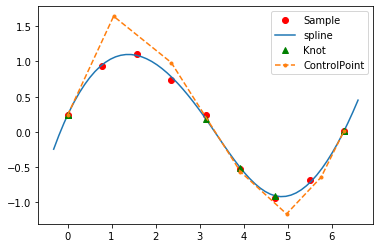

k=3 = len(t)=11 - len(c[0])=7 - 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

x = np.arange(0, 2 * np.pi + np.pi / 4, 2 * np.pi / 8)
y = np.sin(x) + np.random.random(len(x)) / 4

# returned u = input u if input u is provided.
(t, c, k), u = splprep(
    [x, y],
    s=.01,  # smoothness, if s=0, (x, y) will be on spline(this is interpolation?).
    k=3,
    w=np.ones_like(x),  # weights for every sample?
    u=(x / max(x)))

new_u  = np.linspace(-0.05, 1.05, 60)
spline = splev(new_u, (t, c, k))
knots  = splev(t, (t, c, k))
control_points = c

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.plot(*spline, '-')
ax.plot(*knots, 'g^')
ax.plot(*control_points, '.--')
plt.legend(['Sample', 'spline', 'Knot', 'ControlPoint'])
plt.show()

# k = len(t) - len(c[0])
print(f'k={k} = len(t)={len(t)} - len(c[0])={len(c[0])} - 1')


